In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#data=pd.read_csv("C:\\Users\\Utsav\\Desktop\\Mxene\\ML_exp", sep=',',header=0)

url = "https://raw.githubusercontent.com/UtsavMurarka/MXene-machine-learning/master/anant_data_miner/post_midsem_work/data_physical_var_new.csv"

data=pd.read_csv(url, sep=',',header=0)
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,bandgap,nn1,nn2,nn3,nn4,nn5,np1,np2,np3,np4,np5,...,shell4,shell5,spheat1,spheat2,spheat3,spheat4,spheat5,mass_ms1,mass_ms2,mass_ms3,mass_ms4,mass_ms5,mol_ms1,mol_ms2,mol_ms3,mol_ms4,mol_ms5,ther_con1,ther_con2,ther_con3,ther_con4,ther_con5,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,label
0,3.26,0.0,0.0,-1.63,2.82,0.0,0.000000e+00,1.000000e-16,32.8,0.333,0.667,0.383,0.667,0.333,0.220,0.000,0.000,0.301,0.333,0.667,0.275,0.667,0.333,0.328,24.0,24.0,6.0,35.0,35.0,0.0,28,28,6,45,45,24,24,6,35,35,...,4,4,0.449,0.449,0.709,0.474,0.474,44.5,44.5,-6.2,-4.9,-4.9,231.4,231.4,-7.45,-78.3,-78.300,94,94,140.0,0.1200,0.1200,258.3,140.7,140.7,0.8,31.5,0.22962,0.43402,7.145108,5.701870,2381272.203,3122884.800,34.8,0.8,0.012408,745.290,25389.72250,3930.932320,0
1,3.13,0.0,0.0,-1.56,2.71,0.0,0.000000e+00,-2.000000e-16,35.6,0.333,0.667,0.374,0.000,0.000,0.296,0.333,0.667,0.270,0.667,0.333,0.322,0.667,0.333,0.244,24.0,24.0,6.0,35.0,1.0,0.0,28,28,6,45,0,24,24,6,35,1,...,4,1,0.449,0.449,0.709,0.474,14.304,44.5,44.5,-6.2,-4.9,-24.8,231.4,231.4,-7.45,-78.3,-4.999,94,94,140.0,0.1200,0.1805,334.8,198.5,198.5,2.0,42.7,0.29255,0.32078,9.682327,9.898093,2580607.337,3428851.696,34.8,2.0,38.010333,1018.517,21404.72830,3928.950830,0
2,3.24,0.0,0.0,-1.62,2.81,0.0,1.000000e-16,-2.000000e-16,33.1,0.667,0.333,0.220,0.000,0.000,0.302,0.333,0.667,0.379,0.333,0.667,0.274,0.667,0.333,0.330,24.0,24.0,6.0,17.0,35.0,0.0,28,28,6,18,45,24,24,6,17,35,...,3,4,0.449,0.449,0.709,0.479,0.474,44.5,44.5,-6.2,-7.2,-4.9,231.4,231.4,-7.45,-51.5,-78.300,94,94,140.0,0.0089,0.1200,207.0,113.7,113.7,0.8,31.5,0.25133,0.50222,8.639936,9.891952,2452493.793,3209994.998,22.0,0.8,0.012320,768.773,23683.50050,3934.574869,0
3,3.18,0.0,0.0,-1.59,2.75,0.0,0.000000e+00,-1.000000e-16,34.6,0.000,0.000,0.301,0.333,0.667,0.376,0.667,0.333,0.226,0.333,0.667,0.274,0.667,0.333,0.328,24.0,24.0,6.0,17.0,17.0,0.0,28,28,6,18,18,24,24,6,17,17,...,3,3,0.449,0.449,0.709,0.479,0.479,44.5,44.5,-6.2,-7.2,-7.2,231.4,231.4,-7.45,-51.5,-51.500,94,94,140.0,0.0089,0.0089,82.8,54.3,54.3,0.7,31.5,0.27135,0.56642,10.001639,13.110595,2522836.664,3296242.342,2.8,0.7,0.012230,791.727,21905.45450,3938.216184,0
4,3.10,0.0,0.0,-1.55,2.68,0.0,0.000000e+00,2.000000e-16,36.4,0.000,0.000,0.297,0.333,0.667,0.369,0.333,0.667,0.270,0.667,0.333,0.323,0.667,0.333,0.245,24.0,24.0,6.0,17.0,1.0,0.0,28,28,6,18,0,24,24,6,17,1,...,3,1,0.449,0.449,0.709,0.479,14.304,44.5,44.5,-6.2,-7.2,-24.8,231.4,231.4,-7.45,-51.5,-4.999,94,94,140.0,0.0089,0.1805,162.0,110.3,110.3,1.7,42.7,0.31023,0.40418,10.971248,13.115764,2649467.851,3513066.327,9.2,1.7,38.003330,1037.423,19502.05962,3932.594051,0


In [0]:
#drop band gap column
data = data.drop('bandgap', axis=1)
print(np.shape(data))

(3079, 132)


In [0]:
mxene=data.values
mxene=np.array(mxene)
#split the data

train, test = train_test_split(data, test_size=0.2)
train=np.array(train)
test=np.array(test)
NegativeCount=0
PositiveCount=0
for i in range(len(train)):
    if train[i][131]==0 :
        NegativeCount=NegativeCount+1
    if train[i][131]==1:
        PositiveCount=PositiveCount+1
print(NegativeCount)
print(PositiveCount)
print(PositiveCount+NegativeCount)
positives=np.zeros((PositiveCount,132))
negatives=np.zeros((NegativeCount,132))
    
j=0
k=0
    
for i in range(len(train)):

    if(train[i,131] == 1):
        positives[j,:] = train[i,:]
        j=j+1
    if(train[i,131] == 0):
        negatives[k,:] = train[i,:]
        k=k+1

print(np.shape(train))
print(np.shape(test))

2147
316
2463
(2463, 132)
(616, 132)


In [0]:
y_train=np.zeros(len(train))
y_test=np.zeros(len(test))

for i in range(len(test)):
    y_test[i]=test[i][131]
    test[i][131]=1

for i in range(len(train)):
    y_train[i]=train[i][131]
    train[i][131]=1

train = np.delete(train, 131, 1)
test = np.delete(test, 131, 1)

train = np.delete(train, 130, 1)
test = np.delete(test, 130, 1)

print(np.shape(train))
print(np.shape(test))

(2463, 130)
(616, 130)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


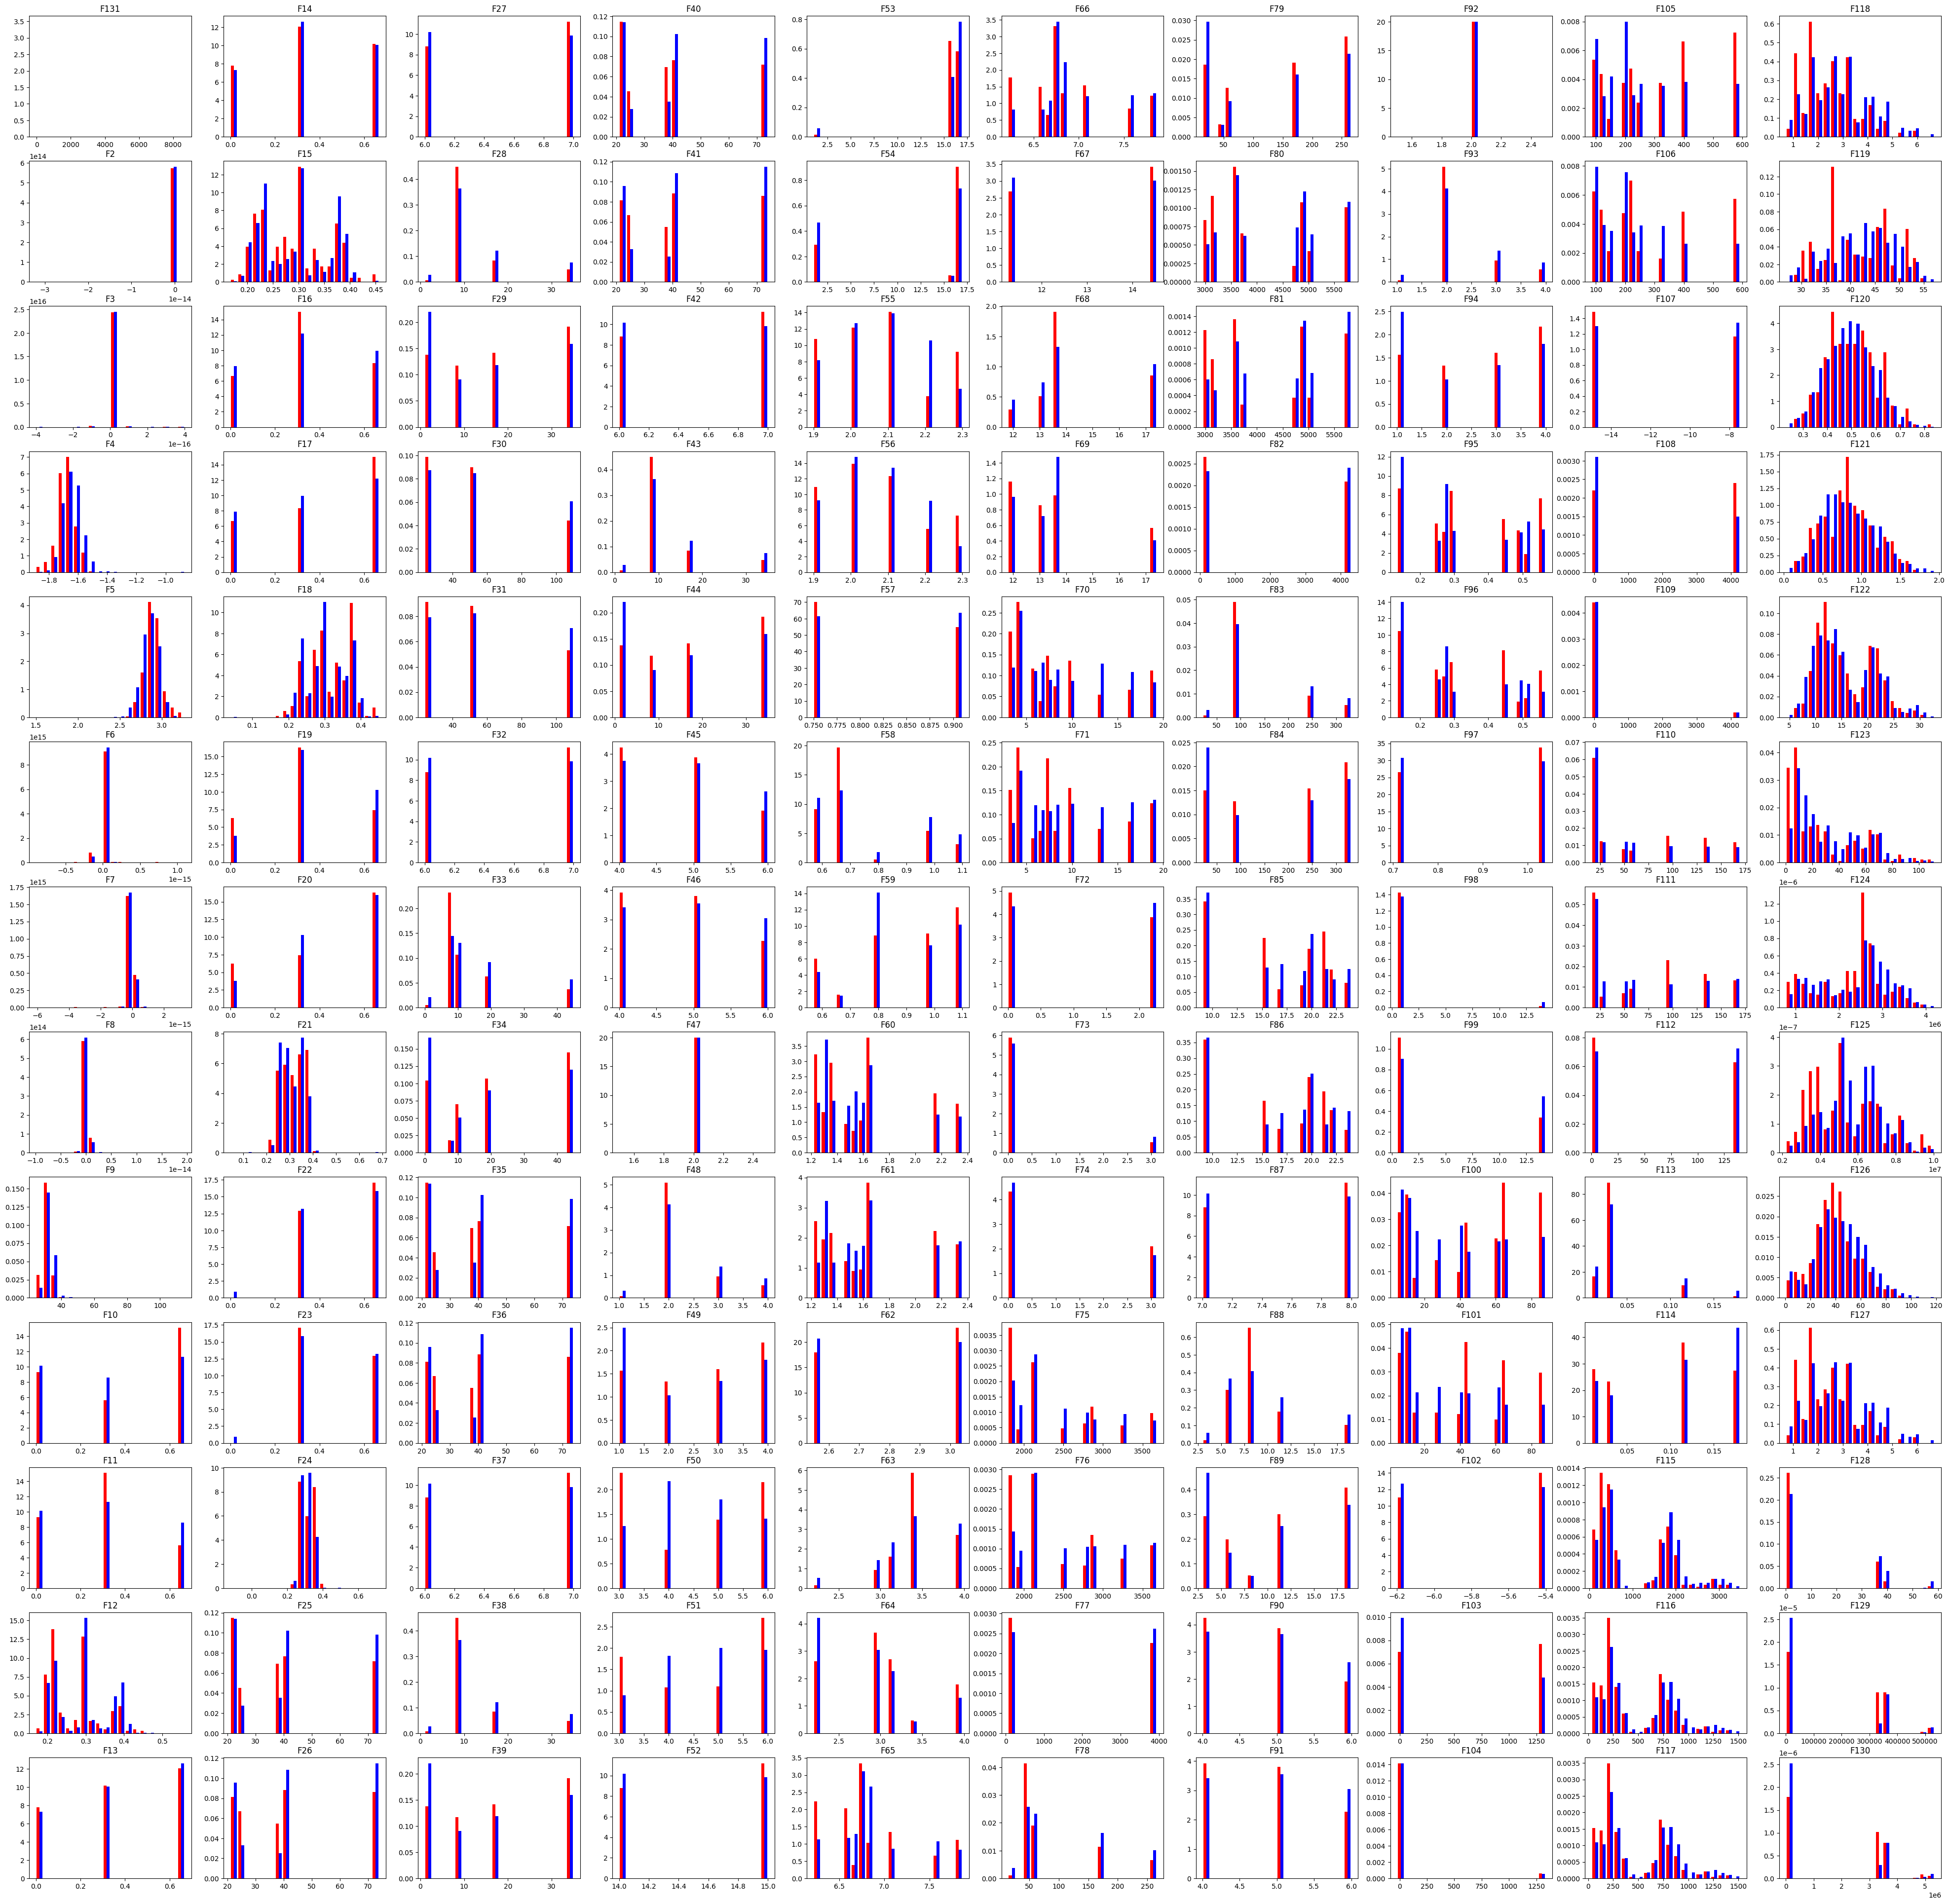

In [0]:
fig, axs = plt.subplots(13, 10)
plt.rcParams['figure.figsize'] = [150,150]
plt.rcParams['figure.dpi'] = 100
bins=20
i=0
j=0
for ind in range(131):
  x=[positives[:,ind], negatives[:,ind]]
  clr=['r', 'b']
  lbl=['Non-metals', 'Metals']
  axs[i,j].hist(x, bins, density=True, color=clr, label=lbl)
  axs[i, j].set_title("F" + str(ind+1))
  i = (i+1)%13
  if (i%13==0):
    j = (j+1)%10

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [0]:
clf_list = [GaussianNB(), LogisticRegression(max_iter=999999999), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),  SVC(probability=True) ]

Accuracy = 66.55844155844156%


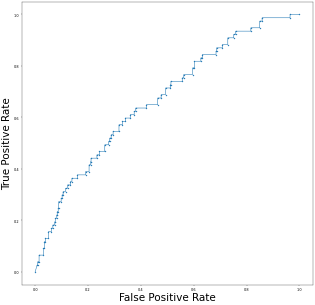

0.6676143893212538
[[366 173]
 [ 33  44]]
Accuracy = 86.68831168831169%


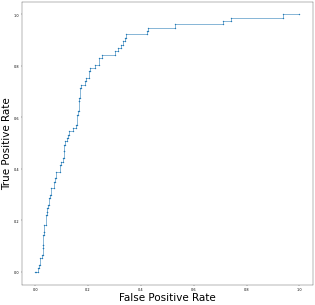

0.8368551670963545
[[517  22]
 [ 60  17]]
Accuracy = 86.85064935064936%


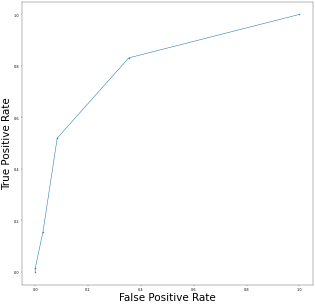

0.7947377298026649
[[523  16]
 [ 65  12]]
Accuracy = 87.66233766233766%


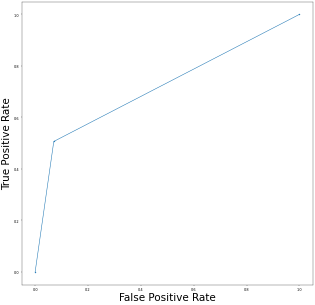

0.7179962894248608
[[501  38]
 [ 38  39]]
Accuracy = 93.18181818181817%


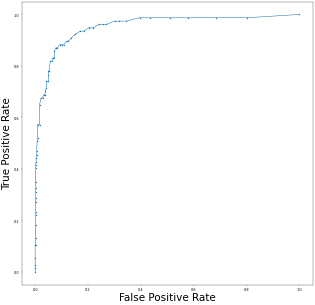

0.9522203214225478
[[530   9]
 [ 33  44]]
Accuracy = 86.85064935064936%


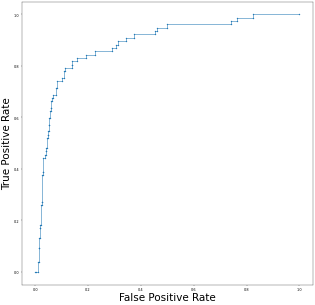

0.8872129725562007
[[533   6]
 [ 75   2]]


In [0]:
plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 25
for clf in clf_list:
  clf.fit(train_scaled, y_train)
  y_pred = clf.predict(test_scaled)
  print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")
  proba = clf.predict_proba(test_scaled)
  proba = proba[:,1]
  lr_fpr, lr_tpr, _ = roc_curve(y_test, proba)
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate', size = 30)
  plt.ylabel('True Positive Rate', size = 30)
  plt.show()
  print(roc_auc_score(y_test, proba))
  print(confusion_matrix(y_test, y_pred))

## Dimensionality Reduction

Accuracy = 85.3896103896104%


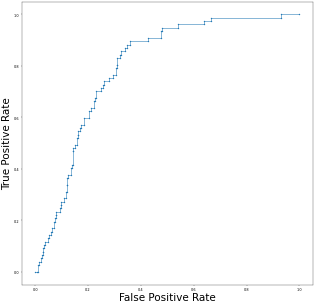

0.796761679878563
[[517  22]
 [ 68   9]]
Accuracy = 86.68831168831169%


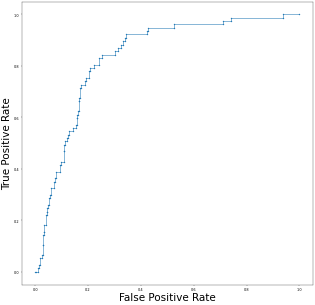

0.8368792617401151
[[517  22]
 [ 60  17]]
Accuracy = 86.85064935064936%


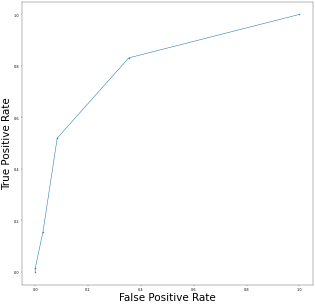

0.7947377298026649
[[523  16]
 [ 65  12]]
Accuracy = 80.03246753246754%


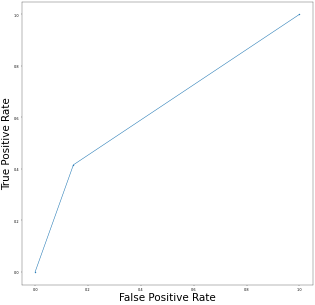

0.6354359925788498
[[461  78]
 [ 45  32]]
Accuracy = 87.33766233766234%


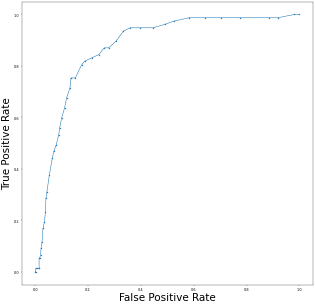

0.8724790978965375
[[537   2]
 [ 76   1]]
Accuracy = 86.85064935064936%


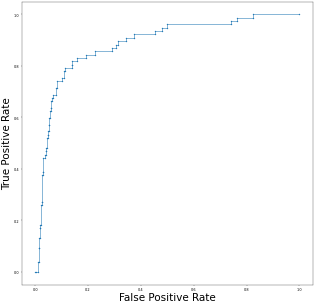

0.8869720261185938
[[533   6]
 [ 75   2]]


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=75)
train_reduced = pca.fit_transform(train_scaled)
test_reduced = pca.transform(test_scaled)

plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 25
for clf in clf_list:
  clf.fit(train_reduced, y_train)
  y_pred = clf.predict(test_reduced)
  print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")
  proba = clf.predict_proba(test_reduced)
  proba = proba[:,1]
  lr_fpr, lr_tpr, _ = roc_curve(y_test, proba)
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate', size = 30)
  plt.ylabel('True Positive Rate', size = 30)
  plt.show()
  print(roc_auc_score(y_test, proba))
  print(confusion_matrix(y_test, y_pred))

Accuracy = 78.4090909090909%


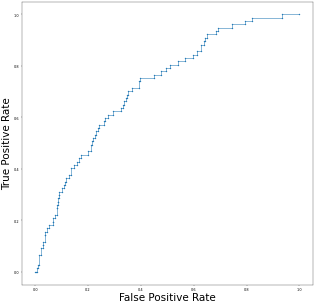

0.7213213502638364
[[449  90]
 [ 43  34]]
Accuracy = 86.68831168831169%


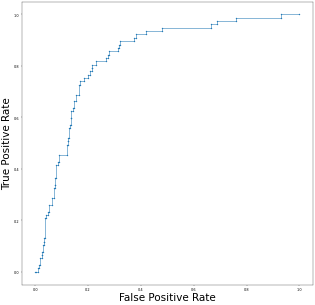

0.8359154759896875
[[519  20]
 [ 62  15]]
Accuracy = 93.9935064935065%


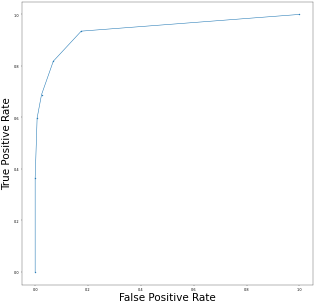

0.9393417343324578
[[526  13]
 [ 24  53]]
Accuracy = 86.52597402597402%


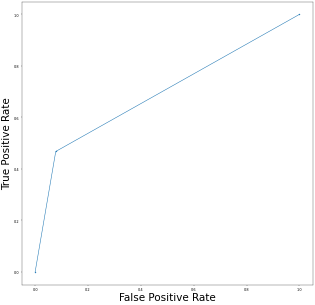

0.6948051948051948
[[497  42]
 [ 41  36]]
Accuracy = 91.23376623376623%


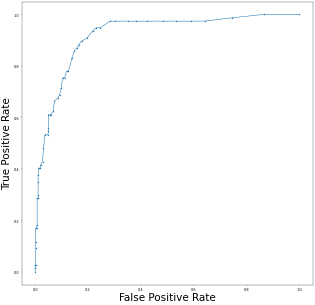

0.9206201961304002
[[533   6]
 [ 48  29]]
Accuracy = 89.12337662337663%


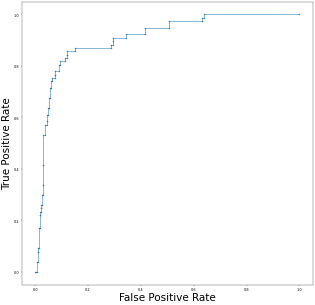

0.9088499626533022
[[523  16]
 [ 51  26]]


In [0]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
nca = NCA(n_components=50)
train_reduced = nca.fit_transform(train_scaled, y_train)
test_reduced = nca.transform(test_scaled)

plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 25
for clf in clf_list:
  clf.fit(train_reduced, y_train)
  y_pred = clf.predict(test_reduced)
  print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")
  proba = clf.predict_proba(test_reduced)
  proba = proba[:,1]
  lr_fpr, lr_tpr, _ = roc_curve(y_test, proba)
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate', size = 30)
  plt.ylabel('True Positive Rate', size = 30)
  plt.show()
  print(roc_auc_score(y_test, proba))
  print(confusion_matrix(y_test, y_pred))

# **Data Visualisation using PCA**

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [0]:
targetDf = pd.DataFrame({'y':y_train})
targetDf.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [0]:
principalDf.head()

,principal component 1,principal component 2
0,2.747960,-3.213069
1,-1.433335,3.270772
2,6.276916,8.381377
3,-2.411122,-5.978819
4,-1.794660,3.014790


In [0]:
finalDf = pd.concat([principalDf, targetDf[['y']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,y
0,2.747960,-3.213069,0.0
1,-1.433335,3.270772,0.0
2,6.276916,8.381377,0.0
3,-2.411122,-5.978819,0.0
4,-1.794660,3.014790,0.0


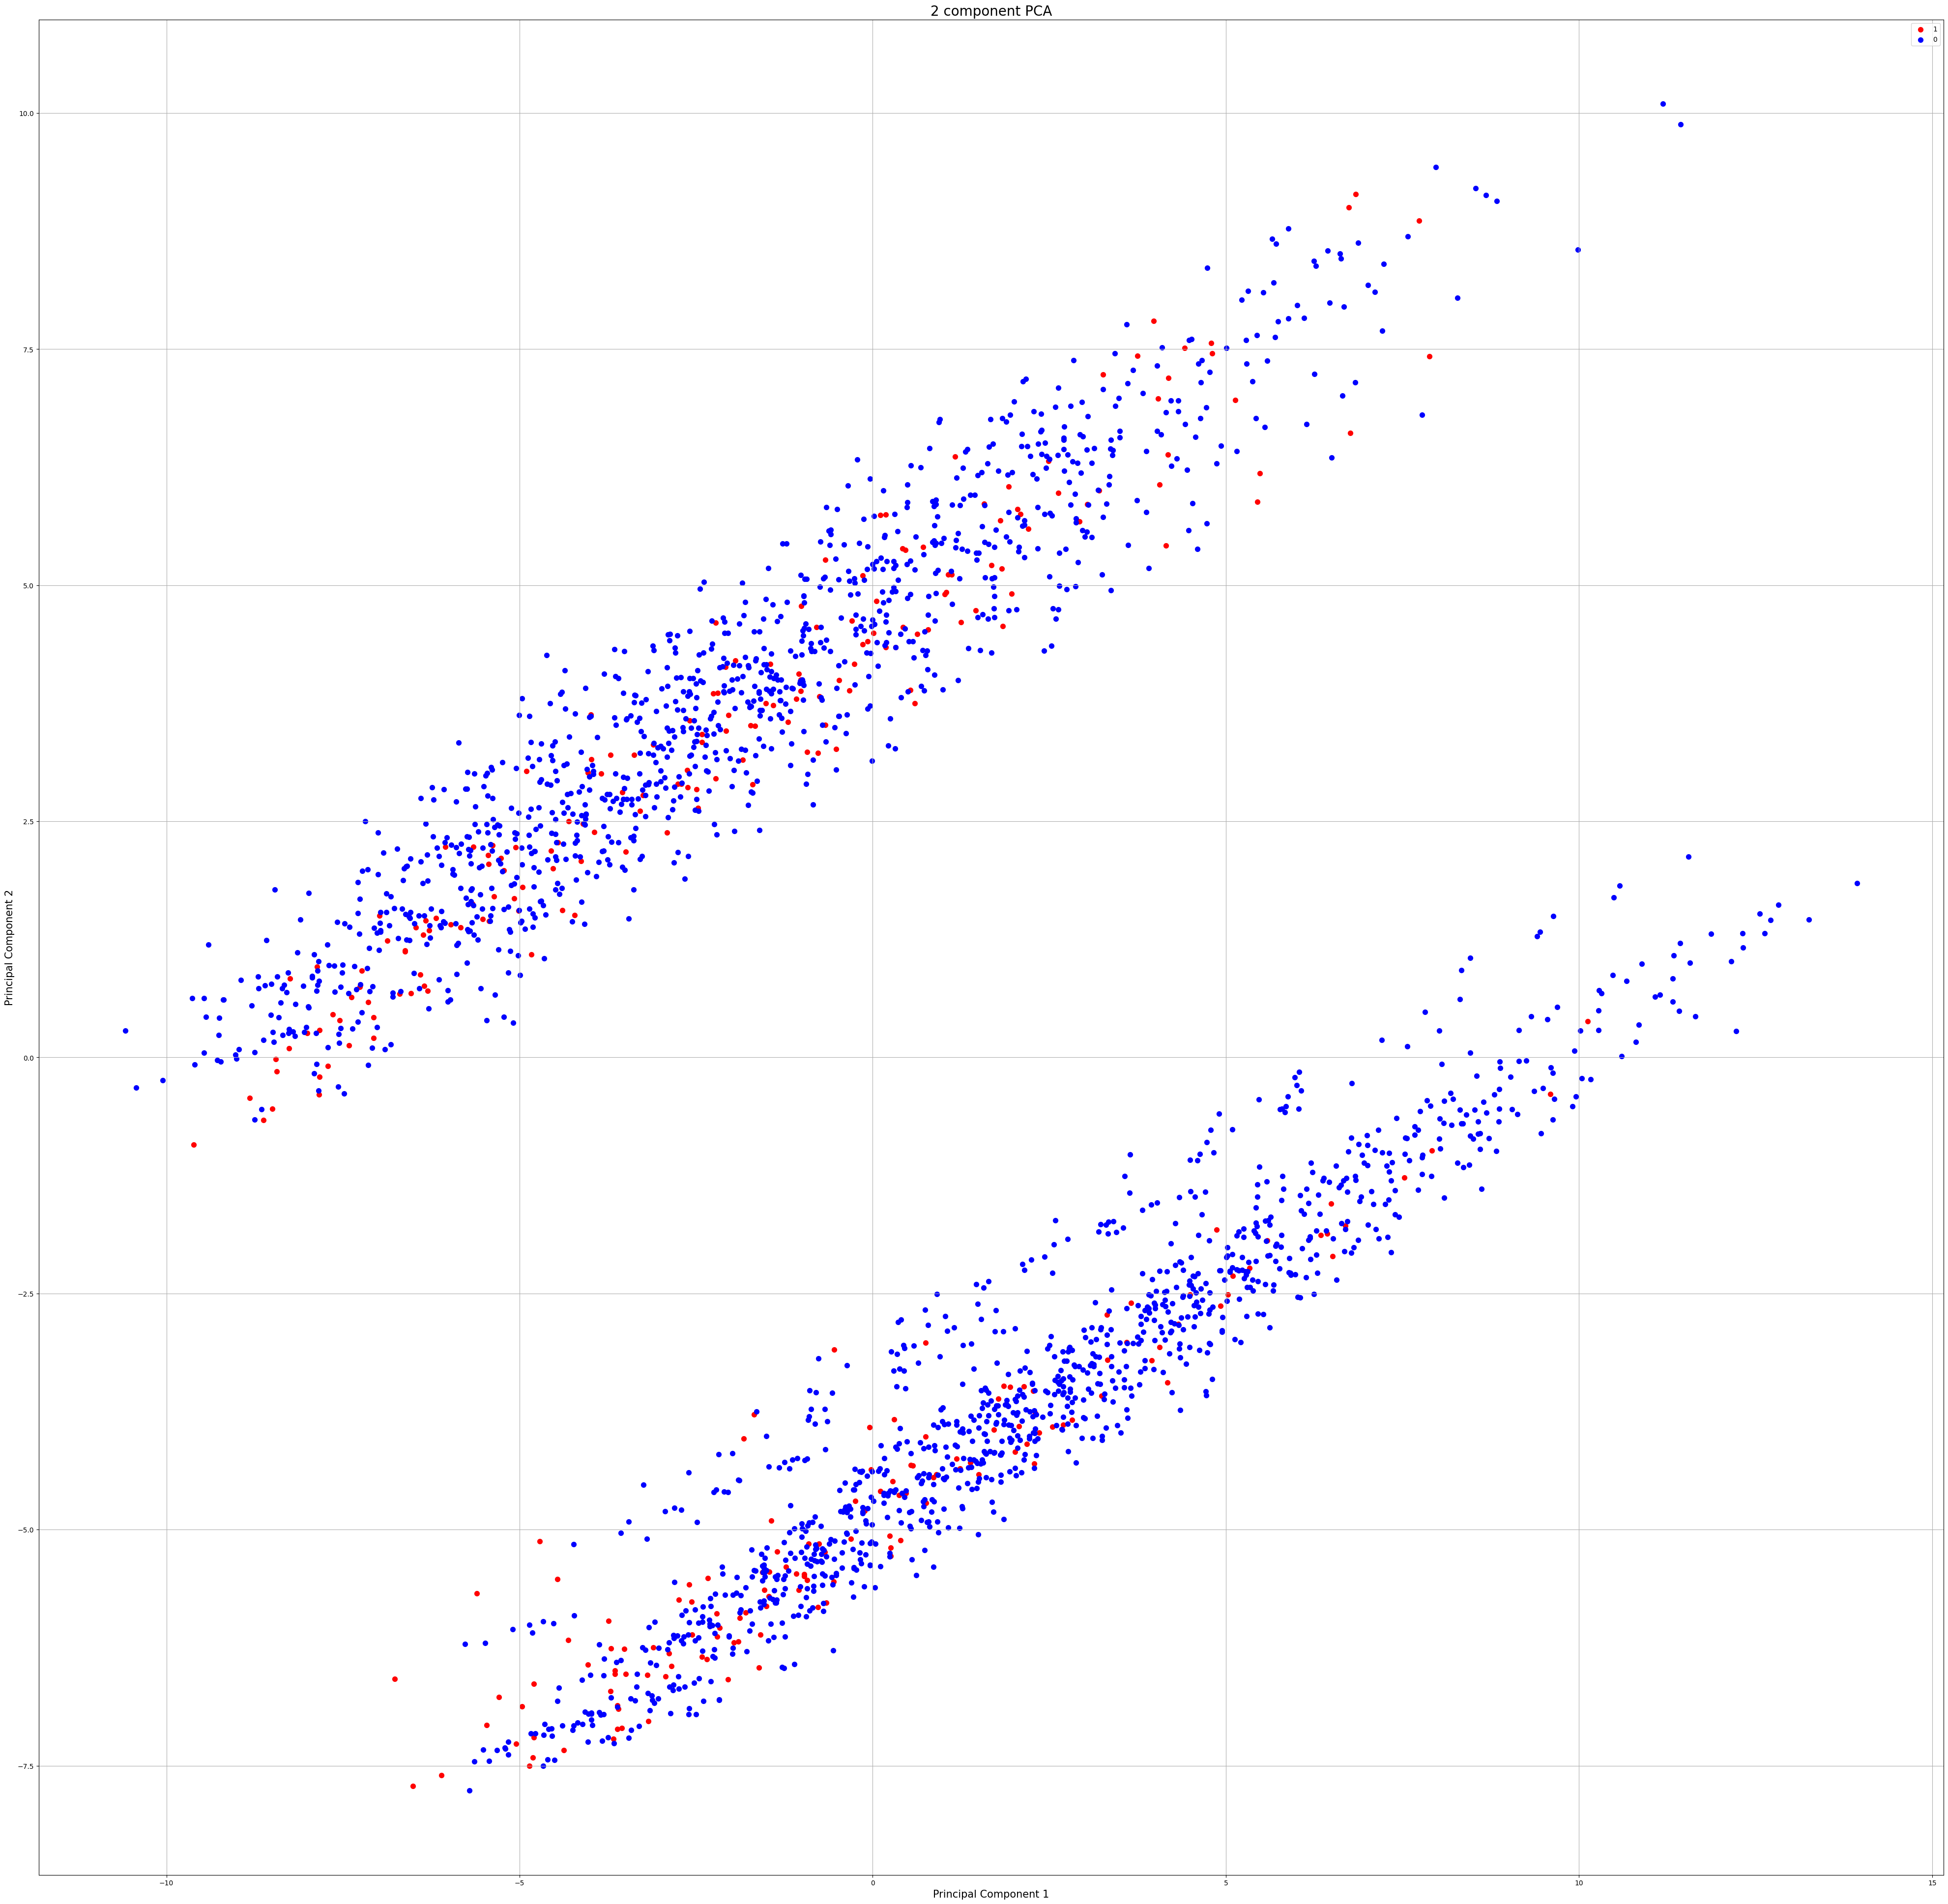

In [0]:
fig = plt.figure(figsize = (50,50))
ax = fig.add_subplot(111) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['y'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],finalDf.loc[indicesToKeep, 'principal component 2'],c = color, s = 50)
ax.legend(targets)
ax.grid()